## Handout 2

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

np.random.seed(0)

### Problem 2.1

In [3]:
def draw_random_sample(n_sim, n_periods, alphas):
    """Simulate AR(1) process.
    
    Args:
        n_sim (int): Number of simulations.
        n_periods (int): Number of periods to simulate.
        alphas (float or list-like): Persistency.
        
    Returns:
        process (np.ndarray): Simulated process with shape (n_sim, n_periods, len(alphas))
            if len(alphas) > 1 else (n_sim, n_periods).
    
    """
    alphas = np.atleast_1d(alphas)
    
    innovations = np.random.normal(0, 1, (n_sim, n_periods + 1, len(alphas)))
    innovations[:, 0, :] /= np.sqrt(1 - alphas ** 2)  # adjust variance of e_0
    
    process = innovations.copy()
    for t in range(n_periods):
        process[:, t + 1, :] = process[:, t, :] * alphas + innovations[:, t, :]
    
    process = process[:, 1:, :]
    if len(alphas) == 1:
        process = np.squeeze(process, axis=2)
        
    return process

In [4]:
def least_squares(process):
    """Fit least squares estimator.
    
    Args:
        process (np.ndarray): Process with shape (a, b, c).
        
    Returns:
        coeff (np.ndarray): Coefficients of shape (a, c).
    
    """
    process_lagged = process[:, :-1, :]
    process = process[:, 1:, :]
    
    coeff = (process * process_lagged).sum(axis=1) / (process_lagged ** 2).sum(axis=1)
    
    residual = process - process_lagged * np.expand_dims(coeff, axis=1)
    
    return coeff, residual

In [5]:
def compute_standard_errors(process, residual):
    """Compute standard error of ols estimate in robust way."""
    standard_errors
    for key in processes.keys():
        se = np.sqrt((residuals[key] ** 2).mean(axis=1) / coeff(processes[key] ** 2).mean(axis=1))
        standard_errors[key] = se
    return se

In [6]:
def reformat_data(coeffs, alpha):
    """Reformat coeffcient data to long-format frame.
    
    Args:
        coeffs (np.ndarray or list-like): Estimates of shape (n_sim, len(alphas)) or list
            with elements of shape (n_sim, len(alphas)). In the latter case the number of
            elements must map one-to-one to argument periods and is interpreted as the
            coefficient estimates using different number of periods.
        alphas (float or list-like): Persistency.
    
    Returns:
        df (pd.DataFrame): Tidy long format data frame.
    
    """
    df = pd.concat({key: pd.DataFrame(value) for key, value in coeffs.items()})
    df = df.rename_axis(["n_periods", "n_sim"])

    df = df.set_axis(alphas, axis=1)

    df = df.reset_index(level="n_periods")
    df = df.melt(id_vars="n_periods", var_name="alpha", value_name="estimate")
    return df

In [16]:
def plot_distribution(df, alphas, coverage=None, path=None):
    """Plot distribution of coefficient given alpha.
    
    Args:
        df (pd.DataFrame): Tidy long format data frame.
        alphas (float or list-like): Persistency.
        path (str): Path where to save the image. Not saved if None.
        
    """
    fig, axes = plt.subplots(len(alphas))
    fig.set_size_inches(13, 30)

    for alpha, ax in zip(alphas, axes):
        palette = sns.color_palette("crest", as_cmap=True)
        p = sns.kdeplot(data=df.query("alpha == @alpha"), x="estimate", hue="n_periods", fill=True, palette=palette, ax=ax)

        ax.set(ylabel="Density", xlabel="Estimate")
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
        ax.text(0.05, 0.95, f"alpha = {alpha}", transform=ax.transAxes, fontsize=14, verticalalignment="top", bbox=props)
        ax.set_frame_on(False)
        ax.xaxis.label.set_size(13)
        ax.yaxis.label.set_size(13)
        ax.axvline(alpha, color="black", alpha=0.4)
    
    if path is not None:
        fig.savefig(path, bbox_inches="tight")
    return None

In [8]:
def compute_metrics(coeff, alphas):
    """Compute aggregate metrics of estimates.
    
    Args:
        coeff (np.ndarray or dict): Estimates of shape (n_sim, len(alphas)).
            If dict then keys correspond to n_periods used in the simulation
            and values to corresponding coffficient estimates.
        alphas (float or list-like): Persistency.
        
    Returns:
        metrics (pd.DataFrame): Metrics data frame in long format.
    
    """
    if not isinstance(coeff, dict):
        coeff = {"Unknown": coeff}

    alphas = np.atleast_1d(alphas)

    df = pd.concat({key: pd.DataFrame(value) for key, value in coeffs.items()})
    df = df.rename_axis(["n_period", "n_sim"])

    df_mse = (
        ((df - alphas) ** 2)
        .groupby("n_period")
        .mean()
        .reset_index()
        .melt(id_vars="n_period", var_name="alpha", value_name="estimate")
        .assign(**{"measure": "mse"})
    )
    
    g = df.groupby("n_period")
    
    metrics = g.agg(["mean", "std"])
    metrics = metrics.reset_index()
    metrics = metrics.melt(id_vars="n_period", var_name=["alpha", "measure"], value_name="estimate")
    metrics = pd.concat((df_mse, metrics), axis=0)
    metrics = metrics.sort_values(by=["n_period", "alpha", "measure"])
    metrics = metrics.replace({k: alpha for k, alpha in enumerate(alphas)})
    
    if len(coeffs) == 1:
        metrics = metrics.drop("n_period")
    
    return metrics

In [9]:
def compute_standard_errors(process, residual, alphas):
    """Compute standard error of ols estimate in robust way."""
    standard_errors = {}
    for key in processes.keys():
        se = np.sqrt((residuals[key] ** 2).mean(axis=1) / (processes[key] ** 2).mean(axis=1))
        standard_errors[key] = se
        
    df = pd.concat({key: pd.DataFrame(value) for key, value in standard_errors.items()})
    df = df.rename_axis(["n_period", "n_sim"])
    df = df.set_axis(alphas, axis=1)
    df = df.reset_index("n_period")
    df = df.melt(id_vars="n_period", var_name="alpha", value_name="se")
    df = df.assign(**{"se": df.se / np.sqrt(df.n_period)})
    
    return df

In [10]:
def compute_coverage(df, standard_error):
    # df = df.assign(**{"se": np.sqrt(np.abs((1 - df.estimate ** 2)) / df.n_periods)})
    df = df.assign(**{"se": standard_error["se"]})
    
    left = df.estimate - 1.96 * df.se < df.alpha
    right = df.alpha < df.estimate + 1.96 * df.se
    df = df.assign(**{"coverage": left & right})
    
    coverage = df.groupby(["n_periods", "alpha"])[["coverage"]].mean()
    return coverage

### Now lets get our hands dirty

Takes a few seconds...

In [11]:
alphas = [0.7, 0.8, 0.9, 0.95, 0.99, 0.999]
n_sim = 10_000
n_periods_list = [200, 500, 800, 1500, 2000]

coeffs = {}
residuals = {}
processes = {}
for n_periods in n_periods_list:
    process = draw_random_sample(n_sim, n_periods, alphas)
    coeff, residual = least_squares(process)
    coeffs[n_periods] = coeff
    residuals[n_periods] = residual
    processes[n_periods] = process

In [12]:
metrics = compute_metrics(coeffs, alphas)
df = reformat_data(coeffs, alphas)

standard_errors = compute_standard_errors(process, residual, alphas)

coverage = compute_coverage(df, standard_errors)

In [13]:
coverage.unstack()

coverage                                        
alpha        0.700   0.800   0.900   0.950   0.990   0.999
n_periods                                                 
200         0.9452  0.9499  0.9481  0.9532  0.9480  0.9434
500         0.9526  0.9496  0.9491  0.9499  0.9468  0.9409
800         0.9469  0.9475  0.9520  0.9510  0.9474  0.9452
1500        0.9526  0.9528  0.9534  0.9495  0.9494  0.9459
2000        0.9508  0.9500  0.9501  0.9533  0.9473  0.9482

In [14]:
# mse
metrics.query("measure == 'mse'").drop("measure", axis=1).set_index(["n_period", "alpha"]).unstack()

estimate                                                  
alpha        0.700     0.800     0.900     0.950     0.990     0.999
n_period                                                            
200       0.002678  0.001899  0.001124  0.000647  0.000215  0.000067
500       0.001033  0.000737  0.000405  0.000220  0.000068  0.000017
800       0.000645  0.000460  0.000248  0.000135  0.000037  0.000008
1500      0.000335  0.000237  0.000127  0.000067  0.000017  0.000003
2000      0.000254  0.000178  0.000098  0.000050  0.000012  0.000002

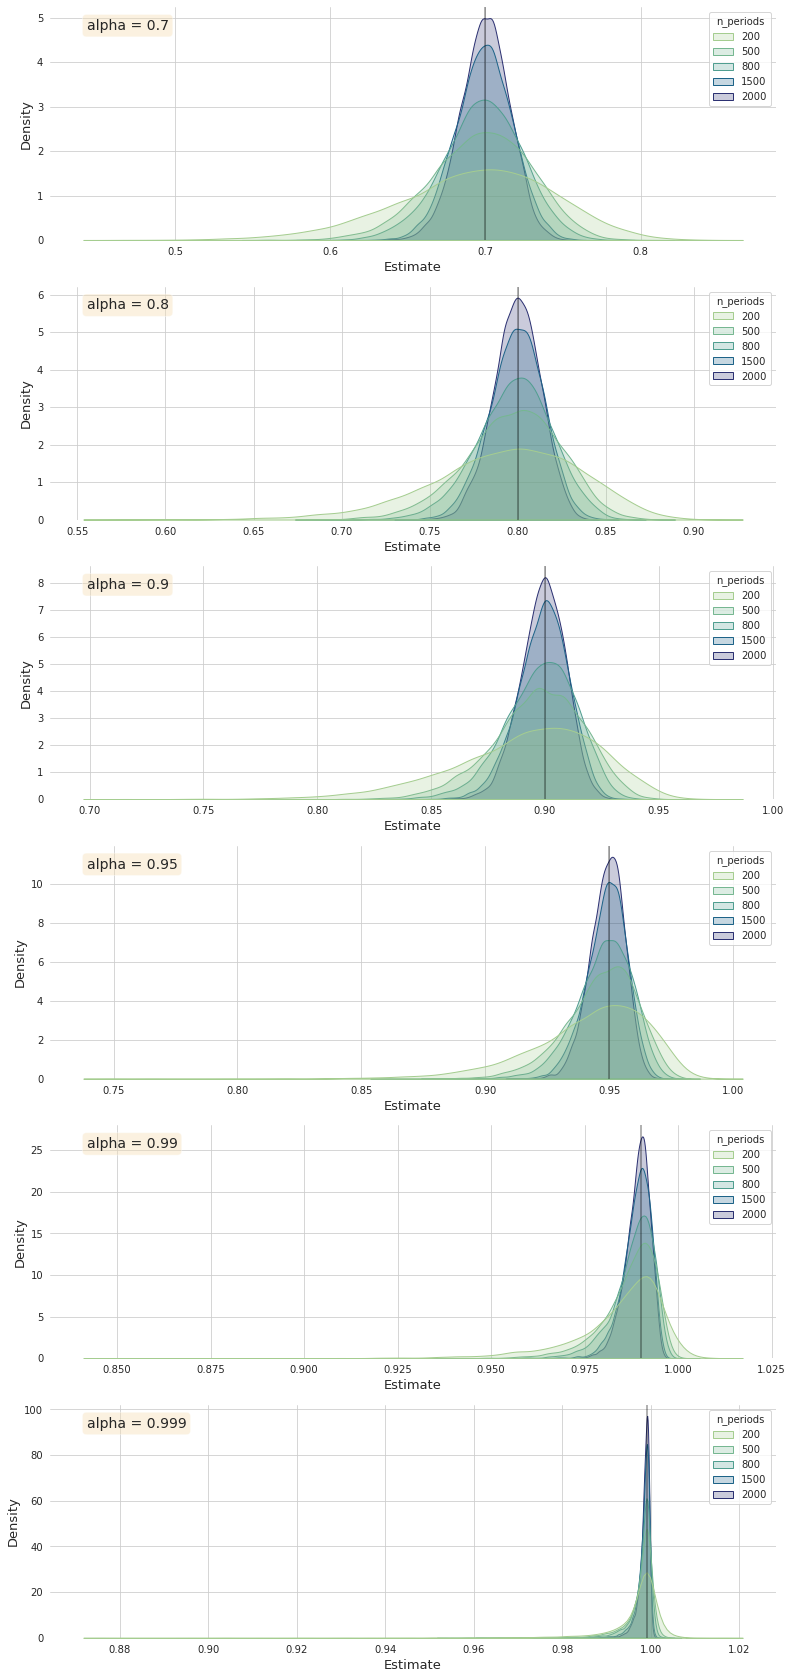

In [17]:
plot_distribution(df, alphas, coverage, "distribution-plot.png")